In [1]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
#import cv2
import random
from math import log
#from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [2]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [3]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

In [4]:
#Arnold Cat Maps
##TRANSFORM
def ArnoldCatTransform(img, num):
    rows = img.height
    cols = img.width
    #rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols])
    for x in range(0, rows):
        for y in range(0, cols):
            if type(img_arnold) == int:
                img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
            
            else:
                img_arnold = (img_arnold, img_arnold)
            
            
    return img_arnold


def ArnoldCatEncryption(imageName, key):
    img = Image.open("me.jpg",'r')
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    
    img.save(imageName.split('.')[0] + "_ArnoldcatEnc.jpg")
    return img

def ArnoldCatDecryption(imageName, key):
    img = Image.open(imageName,'r')
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    img.save(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img


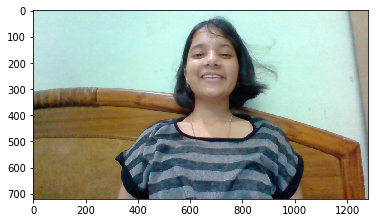

In [5]:
img = Image.open("me.jpg")
plt.imshow(img)


In [6]:
key = 20
arnoldEncrytionIm = ArnoldCatEncryption("me.jpg",key)
plt.imshow(arnoldEncrytionIm)

AttributeError: 'tuple' object has no attribute 'height'